# Deep Dive Analysis of Covid19 Dataset

### Name: Shalesh Nath Sharma
### Date: 17 September 2020      

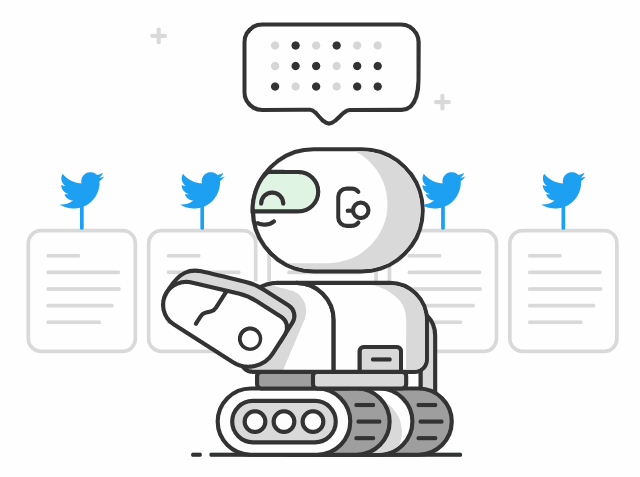

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
from matplotlib import font_manager as fm
from scipy.sparse import coo_matrix
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set Working directory
os.chdir(r'C:\Users\SHALESH\Desktop\inFeedo Data Science Task')

## Read Datasets 

In [3]:
data=pd.read_csv('covid19_tweets.csv')

In [4]:
data.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

## Part A

### Missing Values

In [5]:
# Finding out the % of missing values
100*data.isnull().sum()/len(data)

user_name            0.000000
user_location       20.530071
user_description     5.742904
user_created         0.000000
user_followers       0.000000
user_friends         0.000000
user_favourites      0.000000
user_verified        0.000000
date                 0.000000
text                 0.000000
hashtags            28.660920
source               0.042991
is_retweet           0.000000
dtype: float64

In [6]:
# Dropping the NA values, as imputing values would not be right for this dataset.
data.dropna(inplace = True)

In [7]:
# Re Check for missing values
100*data.isnull().sum()/len(data)

user_name           0.0
user_location       0.0
user_description    0.0
user_created        0.0
user_followers      0.0
user_friends        0.0
user_favourites     0.0
user_verified       0.0
date                0.0
text                0.0
hashtags            0.0
source              0.0
is_retweet          0.0
dtype: float64

### Exploratory Data Analysis

In [8]:
#Lets see if there are any null entries in the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99138 entries, 2 to 179106
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         99138 non-null  object
 1   user_location     99138 non-null  object
 2   user_description  99138 non-null  object
 3   user_created      99138 non-null  object
 4   user_followers    99138 non-null  int64 
 5   user_friends      99138 non-null  int64 
 6   user_favourites   99138 non-null  int64 
 7   user_verified     99138 non-null  bool  
 8   date              99138 non-null  object
 9   text              99138 non-null  object
 10  hashtags          99138 non-null  object
 11  source            99138 non-null  object
 12  is_retweet        99138 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 9.3+ MB


In [9]:
# Summary statistics
data.describe()

user_followers   user_friends  user_favourites
count    9.913800e+04   99138.000000     9.913800e+04
mean     1.550841e+05    2374.224334     1.517543e+04
std      1.012846e+06   10019.923883     4.490681e+04
min      0.000000e+00       0.000000     0.000000e+00
25%      3.220000e+02     210.000000     3.330000e+02
50%      1.546000e+03     666.000000     2.184000e+03
75%      7.576000e+03    1951.000000     1.038475e+04
max      2.435916e+07  497363.000000     2.047197e+06

#### Date vs Tweet Counts

In [10]:
# Data Analysis of the Date Column
date_df = data.copy()
date_df['date'].value_counts()

2020-07-29 16:00:00    18
2020-08-04 07:00:00    17
2020-08-06 16:00:00    17
2020-08-10 15:30:00    16
2020-07-29 16:30:00    16
                       ..
2020-08-30 02:29:13     1
2020-08-14 06:05:23     1
2020-08-22 06:20:17     1
2020-07-26 06:06:09     1
2020-08-16 08:19:50     1
Name: date, Length: 83784, dtype: int64

In [11]:
date_df['Dates'] = pd.to_datetime(date_df['date']).dt.date
date_df['Time'] = pd.to_datetime(date_df['date']).dt.time

In [12]:
date_count = date_df['Dates'].value_counts()
date_count = date_df['Dates'].value_counts().reset_index()
date_count = pd.DataFrame(date_count)
date_count.columns = ['Date', 'counts']
date_count

Date  counts
0   2020-07-25    9272
1   2020-08-22    6370
2   2020-08-30    4529
3   2020-08-09    4285
4   2020-07-26    4284
5   2020-08-11    4251
6   2020-08-17    4249
7   2020-08-04    4245
8   2020-07-27    4207
9   2020-08-12    4192
10  2020-07-31    4167
11  2020-08-01    4158
12  2020-08-13    4153
13  2020-08-16    4140
14  2020-08-06    4136
15  2020-07-28    4114
16  2020-08-14    4113
17  2020-08-18    4109
18  2020-08-08    4099
19  2020-08-02    3990
20  2020-08-10    2649
21  2020-08-29    2107
22  2020-07-29    1527
23  2020-07-30    1064
24  2020-08-07     575
25  2020-07-24     153

Text(0.5, 1.0, 'Number of Tweet per day')

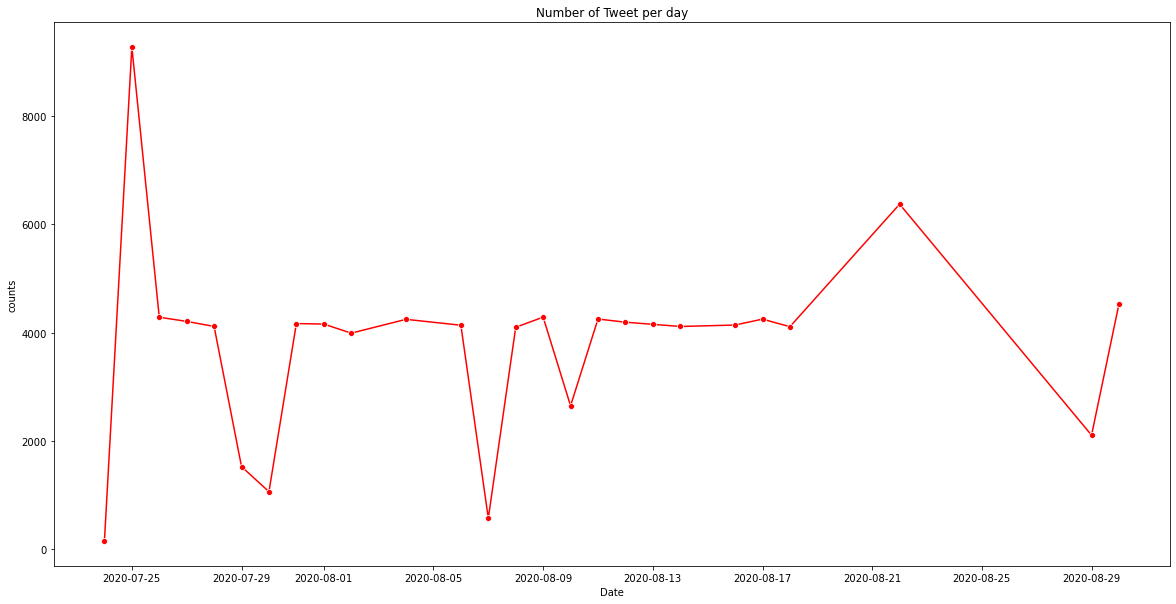

In [13]:
# Plotting the number of tweets per day
plt.figure(figsize = (20,10))
sns.lineplot(x =date_count.Date, y = date_count.counts, color = 'red', marker = 'o')
plt.title('Number of Tweet per day')

##### <font color=red> The maximum tweets were observed on 25-07-2020 and there was a major decline from 21-08-2020 to 29-08-2020.

## Bivariate Analysis

In [14]:
data1=data.copy()

In [15]:
data1['datedt'] = pd.to_datetime(data1['date'])

In [16]:
data1['year'] = data1['datedt'].dt.year
data1['month'] = data1['datedt'].dt.month
data1['day'] = data1['datedt'].dt.day
data1['dayofweek'] = data1['datedt'].dt.dayofweek
data1['hour'] = data1['datedt'].dt.hour
data1['minute'] = data1['datedt'].dt.minute
data1['dayofyear'] = data1['datedt'].dt.dayofyear
data1['date_only'] = data1['datedt'].dt.date

In [17]:
tweets_agg_df = data1.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [18]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.gca().invert_xaxis()
    plt.show() 

In [19]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

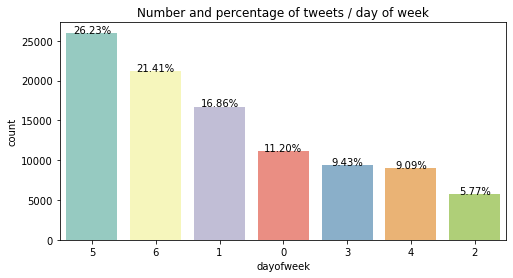

In [20]:
plot_count("dayofweek", "tweets / day of week", data1, size=2)

##### <font color=red> The maximum tweets were observed for Saturday and Sunday in a week due to most work-offs.

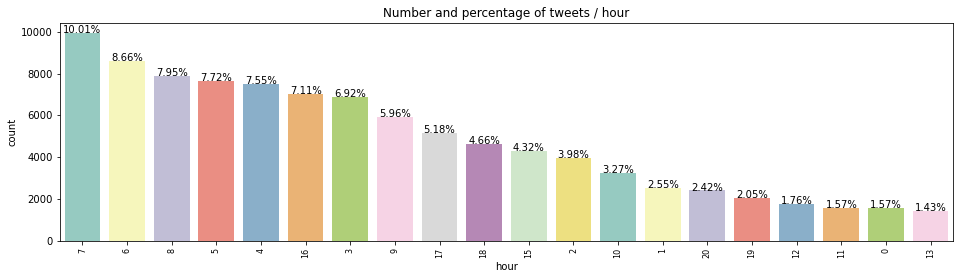

In [21]:
plot_count("hour", "tweets / hour", data1,size=4)

##### <font color=red> The maximum tweets were observed at 7 am & 6 am with around 18% of tweets as compared to the other time of the day.

#### Username vs Count Analysis(Tweet Count)

In [22]:
username = data['user_name'].value_counts().reset_index()
username = pd.DataFrame(username)
username.columns = ['Twitter UserName', 'Number of Tweets']
username = username.head(15)
username

Twitter UserName  Number of Tweets
0              covidnews.ch               402
1        GlobalPandemic.NET               320
2        Blood Donors India               282
3           Hindustan Times               267
4               IANS Tweets               228
5                       OTV               212
6               COVID Scale               191
7            Sambad English               176
8                       ANI               167
9              ABS-CBN News               164
10   The New Indian Express               157
11             Hotpage News               135
12  National Cyber Security               134
13             IAM Platform               129
14     ABS-CBN News Channel               125

##### <font color=red> The covidnews.ch	has tweeted the most with around 80 more tweets than the first.

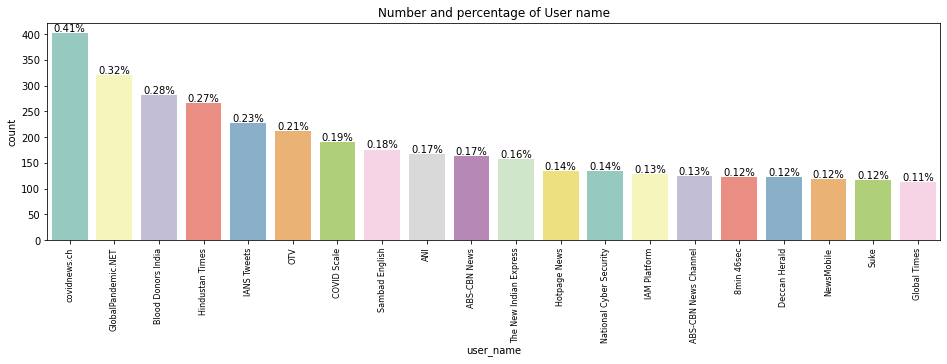

In [23]:
plot_count("user_name", "User name", data,4)

##### <font color=red> Top 10 username with maximum number of tweets:
- covidnews.ch
- GlobalPandemic.NET
- Blood Donors India
- Hindustan Times
- IANS Tweets
- OTV
- COVID Scale
- Sambad English
- ANI
- ABS-CBN News.

#### User verified Analysis

In [24]:
data['user_verified'].value_counts()

False    83223
True     15915
Name: user_verified, dtype: int64

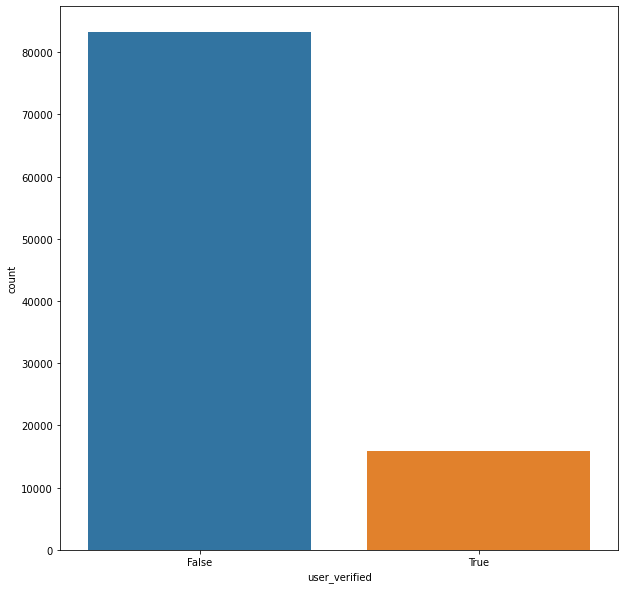

In [25]:
plt.figure(figsize = (10,10))
sns.countplot('user_verified', data = data)

##### <font color=red> Only around 19% of the tweets came from verified accounts.

#### Number of Followers Analysis

In [26]:
new = data[['user_name', 'user_followers']].copy()
new = new.drop_duplicates(subset = ['user_name'])

new = new.sort_values(by = ['user_followers'], ascending = False)
new15 = new.head(15)
new15

user_name  user_followers
174909              National Geographic        24359165
235                                CGTN        13892795
1161                               NDTV        13417047
5085                 The Times Of India        12978677
3872                     United Nations        12748145
3251                  China Xinhua News        12681122
105719                CNN International        11081219
129519                            WIRED        10380131
13557                          ABP News        10172489
47268                      Ivanka Trump         9222125
47022   World Health Organization (WHO)         8158987
2020                    Hindustan Times         7647627
9337                     Shashi Tharoor         7634361
3333                          Anonymous         7379859
6827              People's Daily, China         7114480

Text(0.5, 1.0, 'Top 15 Twitter usernames by follower count')

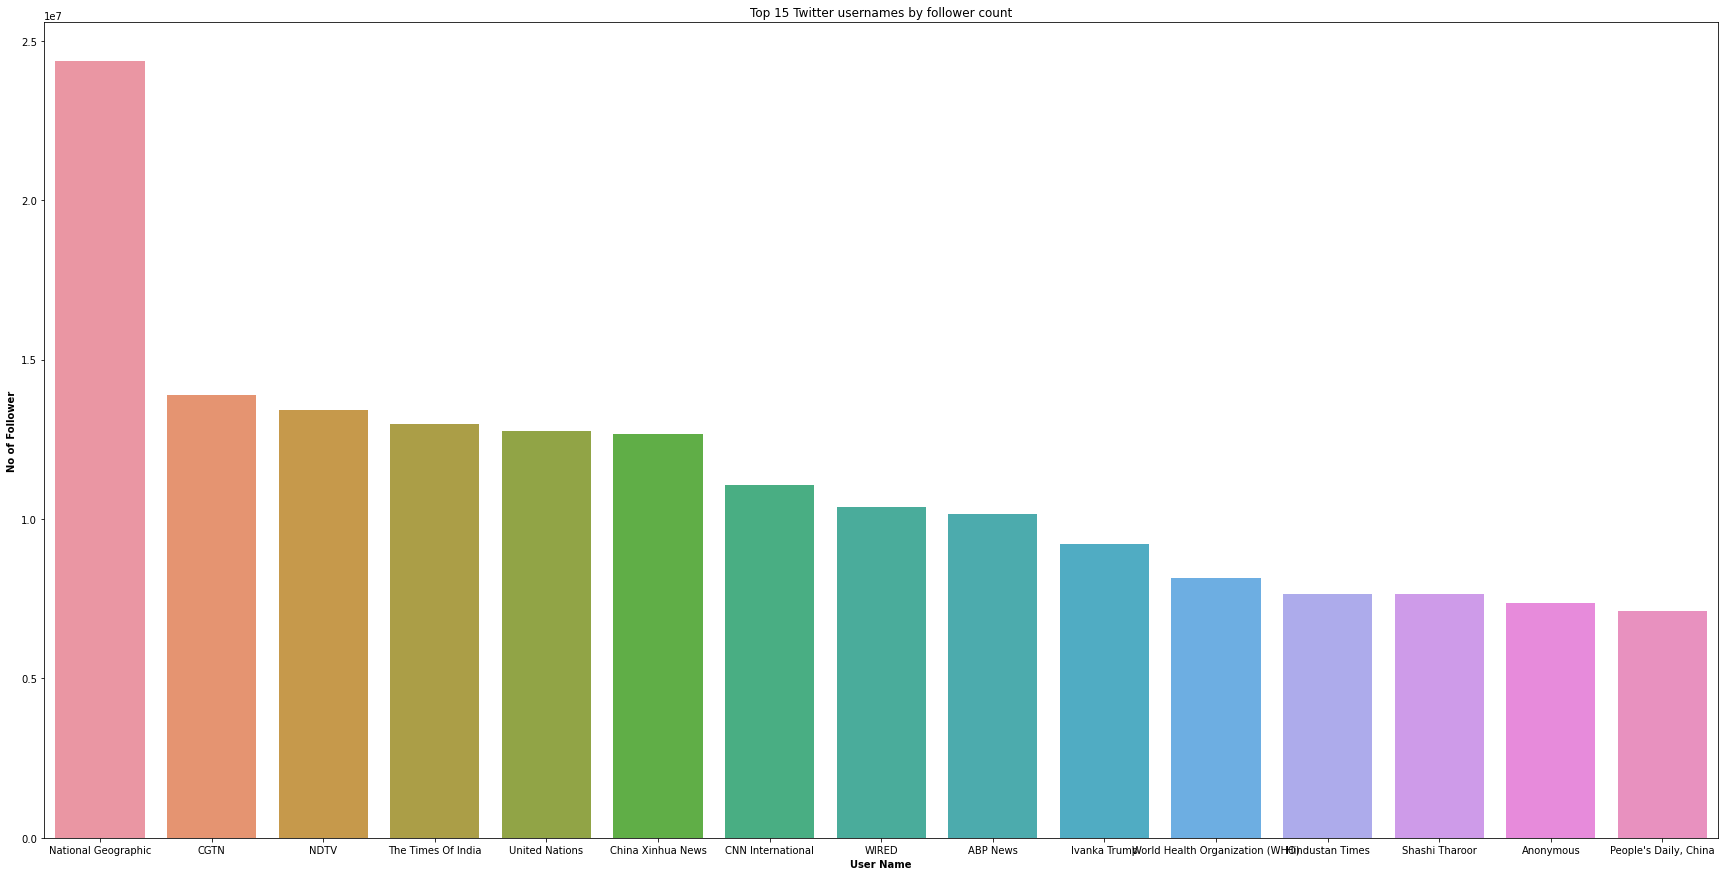

In [27]:
plt.figure(figsize = (30,15))
sns.barplot(x = 'user_name', y = 'user_followers', data = new15)
plt.xlabel('User Name', fontweight = 'bold')
plt.ylabel('No of Follower', fontweight = 'bold')
plt.title('Top 15 Twitter usernames by follower count')

#### <font color=red> Top 5 Twitter pages in terms of twitter followers:

- National Geographic
- CGTN
- NDTV
- The Times of India
- United Nations

In [28]:
import plotly.express as px

# Lets see top 40 users by number of tweets
ds = data['user_name'].value_counts().reset_index()
ds.columns = ['user_name', 'tweets_count']
ds = ds.sort_values(['tweets_count'])
fig = px.bar(
    ds.tail(40), 
    x="tweets_count", 
    y="user_name", 
    orientation='h', 
    title='Top 40 users by number of tweets', 
    width=800, 
    height=800
)
fig.show()

##### <font color=red> The covidnews.ch tops the list with 80 more records

In [29]:
data2 = pd.merge(data, ds, on='user_name')

In [30]:
# Let's see most popular users by followers
data2 = data2.sort_values('user_followers', ascending=False)
data3 = data2.drop_duplicates(subset='user_name', keep="first")
data3 = data3[['user_name', 'user_followers', 'tweets_count']]
data3 = data3.sort_values('user_followers')
fig = px.bar(
    data3.tail(40), 
    x="user_followers", 
    y="user_name", 
    color='tweets_count',
    orientation='h', 
    title='Top 40 users by number of followers', 
    width=800, 
    height=800
)
fig.show()

##### <font color=red> The National Geographic has the most number of followers but Hindustan Times has the most number of tweets count.

In [31]:
# Let's see most popular users by number of friends
data2 = data2.sort_values('user_friends', ascending=False)
data4 = data2.drop_duplicates(subset='user_name', keep="first")
data4 = data4[['user_name', 'user_friends', 'tweets_count']]
data4 = data4.sort_values('user_friends')
fig = px.bar(
    data4.tail(40), 
    x="user_friends", 
    y="user_name", 
    color = 'tweets_count',
    orientation='h', 
    title='Top 40 users by number of friends', 
    width=800, 
    height=800
)
fig.show()

##### <font color=red> Tim Fargo has the most number of friends on twitter and and is close to have the most number of tweets after YesPunjab.com

In [32]:
# Let's see how coronavirus affect to new users creation
data1['user_created'] = pd.to_datetime(data1['user_created'])
data1['year_created'] = data1['user_created'].dt.year
data5 = data1.drop_duplicates(subset='user_name', keep="first")
data5 = data5[data5['year_created']>1970]

data5 = data5['year_created'].value_counts().reset_index()
data5.columns = ['year', 'number']

fig = px.bar(
    data5, 
    x="year", 
    y="number", 
    orientation='v', 
    title='User created year by year', 
    width=800, 
    height=600
)
fig.show()

##### <font color=red> The year 2020 showed around 2% increase in the number of more new accounts created during the pandemic

#### User Location Analysis

In [33]:
# We are importing an additional datasource from kaggle link (https://www.kaggle.com/andradaolteanu/iso-country-codes-global)
country_df = pd.read_csv("iso_country_codes.csv") 

In [34]:
country_df.head()

English short name lower case Alpha-2 code Alpha-3 code  Numeric code  \
0                      Zimbabwe           ZW          ZWE           716   
1                        Zambia           ZM          ZMB           894   
2                         Yemen           YE          YEM           887   
3                Western Sahara           EH          ESH           732   
4             Wallis and Futuna           WF          WLF           876   

      ISO 3166-2  
0  ISO 3166-2:ZW  
1  ISO 3166-2:ZM  
2  ISO 3166-2:YE  
3  ISO 3166-2:EH  
4  ISO 3166-2:WF

In [35]:
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.head()

country alpha2 alpha3  numeric            iso
0           Zimbabwe     ZW    ZWE      716  ISO 3166-2:ZW
1             Zambia     ZM    ZMB      894  ISO 3166-2:ZM
2              Yemen     YE    YEM      887  ISO 3166-2:YE
3     Western Sahara     EH    ESH      732  ISO 3166-2:EH
4  Wallis and Futuna     WF    WLF      876  ISO 3166-2:WF

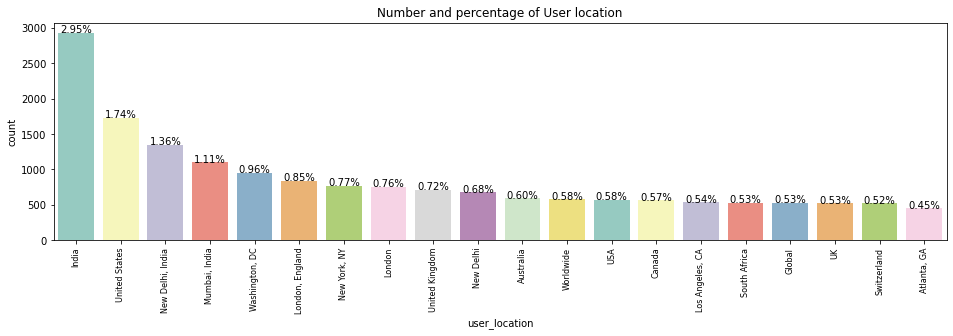

In [36]:
plot_count("user_location", "User location", data,4)

##### <font color=red> India is the most highest number of tweeting countries as per locations

In [37]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot, plot 

# let's see top 15 users by no. of tweets
user_analysis = pd.DataFrame(data['user_name'].value_counts().sort_values(ascending=False))
user_analysis = user_analysis.rename(columns={'user_name':'count'})

trace = go.Bar(x = user_analysis.index[:15],
              y = user_analysis['count'][:15],
              marker = dict(color='rgba(255,155,128,0.5)',
              line = dict(color='rgb(0,0,0)', width=1.5)))

layout = go.Layout(title="Top 15 user by no. of tweets",
                  xaxis=dict(title='User Name',zeroline= False,
                         gridcolor='rgb(183,183,183)',showline=True),
                  yaxis=dict(title='Frequency of tweets',zeroline= False,
                            gridcolor='rgb(183,183,183)',showline=True),
                  font=dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)')
)
data1 = [trace]
fig = go.Figure(data = data1, layout = layout)
iplot(fig)


In [38]:
# let's see top 15 users by no. of location
location_analysis = pd.DataFrame(data['user_location'].value_counts().sort_values(ascending=False))
location_analysis = location_analysis.rename(columns={'user_location':'count'})


data1 = {
   "values": location_analysis['count'][:15],
   "labels": location_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(
   {
      "title":"Location Ratio",
}
)

data1 = [data1]
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

##### <font color=red> 20% of the total tweets were from India during the given time period

In [39]:
# Renaming the column to merge with the country codes dataset
data['country'] =data['user_location']

In [40]:
# Merging the countries dataset with the tweets dataset
data_location = data.merge(country_df, on="country")

In [41]:
tw_add_df = data_location.groupby(["country", "iso", "alpha3"])['text'].count().reset_index()
tw_add_df.columns = ["country", "iso", "alpha3", "tweets"]

#### Tweet Source Analysis

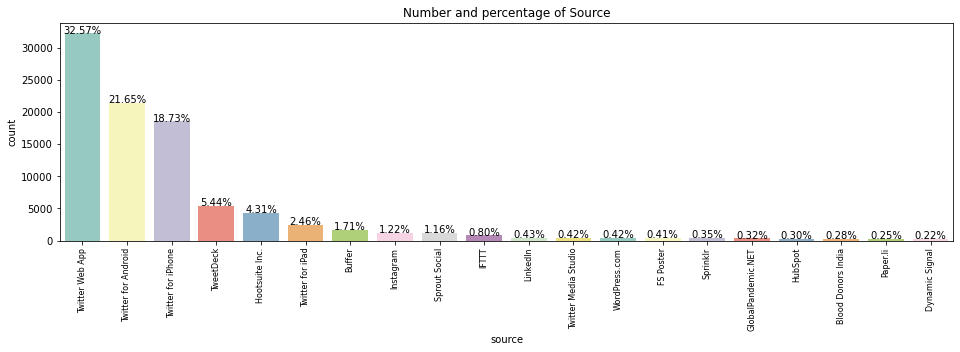

In [42]:
plot_count("source", "Source", data,4)

##### <font color=red> 32.57% of the tweets were from the desktop version of twitter.

In [43]:
# Creating a copy of the data
data1 = data.copy()
data1.dropna(inplace = True)

In [44]:
# Now it's time to check last one categorical feature - source. Lets see top 40 sources by the number of tweets
data1 = data1['source'].value_counts().reset_index()
data1.columns = ['source', 'count']
data1 = data1.sort_values(['count'])
fig = px.bar(
    data1.tail(40), 
    x="count", 
    y="source", 
    orientation='h', 
    title='Top 40 user sources by number of tweets', 
    width=800, 
    height=800
)
fig.show()

## Sentiment Analysis on Covid19 Tweets

In [45]:
# Here I have imported a separate file for the detailed analysis
sentiment_df = pd.read_csv('final_sentiments_data.csv')

In [46]:
sentiment_df['sentiment'].nunique

<bound method IndexOpsMixin.nunique of 0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object>

In [47]:
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [48]:
from nltk.corpus import stopwords
sentiment_df.loc[:, 'text'] = sentiment_df['text'].apply(punctuation_stopwords_removal)

In [49]:
reviews_split = []
for i, j in sentiment_df.iterrows():
    reviews_split.append(j['text'])

In [50]:
words = []
for review in reviews_split:
    for word in review:
        words.append(word)

In [51]:
print(words[:20])

['agree', 'poor', 'india', 'treated', 'badly', 'poors', 'seek', 'living', 'singapore', 'treated', 'like', 'citizens', 'given', 'free', 'medical', 'treatment', 'given', 'food', 'daily', 'sim']


### Encoding Tweets
Create an array that contains integer encoded version of words in reviews. The word appearing the most should have least integer value. Example if the appeared the most in reviews, then assign 'the' : 1

In [52]:
from collections import Counter

counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word:ii for ii, word in enumerate(vocab, 1)}

In [53]:
encoded_reviews = []
for review in reviews_split:
    encoded_reviews.append([vocab_to_int[word] for word in review])

In [54]:
print(len(vocab_to_int))
print(encoded_reviews[:10])

10662
[[853, 186, 20, 1079, 1457, 4429, 2201, 407, 1240, 1079, 15, 218, 337, 167, 253, 462, 337, 122, 168, 4430, 4431, 140, 23, 264, 58, 765, 3, 5, 195, 1079, 2966, 274], [80, 1755, 4432, 2967, 4433, 86, 854, 1080, 2968, 4434, 4435, 7], [543, 4436, 946, 1458, 265, 2, 1241, 168, 2202], [1, 4437, 169, 266, 1459, 129, 1242, 47, 7], [304, 1756, 4438, 168, 8, 39, 219, 93, 355, 4, 21], [2203, 2204, 1, 1757, 1243, 2969, 1460, 1081, 1461, 4439, 98, 4440], [947, 37, 1758, 285, 948, 4441, 1462, 2205, 13, 3, 5, 4442, 285, 1244, 4443, 1463, 4444, 4445, 286, 4446, 15, 4447, 47, 228, 2970, 338, 40, 312, 1463, 179, 1759], [41, 377, 149, 1245, 4448, 34], [2206, 649, 180, 1760, 2207, 91, 650, 378, 463, 1246, 595, 1464, 2208, 2, 8, 2209, 651, 40, 379, 2210, 21, 228, 703, 1246, 1761, 408], [2206, 649, 180, 1760, 2207, 91, 650, 378, 463, 1246, 595, 1464, 2208, 2, 8, 2209, 651, 40, 379, 2210, 21, 228, 703, 1246, 2971]]


### Encoding Sentiments

In [55]:
# For simplicity purposes, I am encoding positive sentiment such as joy as 1 and rest (anger, sad) as 0

labels_to_int = []
for i, j in sentiment_df.iterrows():
    if j['sentiment']=='joy':
        labels_to_int.append(1)
    else:
        labels_to_int.append(0)
    

### Detecting any outlier reviews
This step involves -

Getting rid of extremely long/short reviews
Padding/truncating reaining data to maintain constant review length.

In [56]:
reviews_len = Counter([len(x) for x in encoded_reviews])
print(max(reviews_len))

48


In [57]:
print(len(encoded_reviews))

3090


In [58]:
non_zero_idx = [ii for ii, review in enumerate(encoded_reviews) if len(encoded_reviews)!=0]
encoded_reviews = [encoded_reviews[ii] for ii in non_zero_idx]
encoded_labels = np.array([labels_to_int[ii] for ii in non_zero_idx])

In [59]:
print(len(encoded_reviews))
print(len(encoded_labels))

3090
3090


##### <font color=red> The encoded labels and reviews were 3090.

In [60]:
def pad_features(reviews_int, seq_length):
    features = np.zeros((len(reviews_int), seq_length), dtype=int)
    for i, row in enumerate(reviews_int):
        if len(row)!=0:
            features[i, -len(row):] = np.array(row)[:seq_length]
    return features

In [61]:
seq_length = 50
padded_features= pad_features(encoded_reviews, seq_length)
print(padded_features[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  853  186   20 1079 1457 4429 2201  407 1240 1079
    15  218  337  167  253  462  337  122  168 4430 4431  140   23  264
    58  765    3    5  195 1079 2966  274]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   80 1755 4432 2967
  4433   86  854 1080 2968 4434 4435    7]]


# Topic Modelling using Latent Dirichlett Allocation

This notebook will guide you through the application of Latent Dirichlett Allocation algorithm to topic modelling. Topic modelling is a statistical technique used to assign topics to texts. These topics are assigned on the basis of variety of parameters using LDA. Latent = hidden, Dirichlett = topic, Allocation = Assignment. Let's have a look how it is done.

In [62]:
data1 = data.copy()
data1.dropna(inplace = True)

In [63]:
data_text=data1['text']

In [64]:
document=set(data_text)

In [65]:
document=list(document)

In [66]:
# Removes unnecessary markers from the tweet text like urls.
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [67]:
all_tweets_no_urls = [remove_url(tweet) for tweet in document]
er=set(all_tweets_no_urls)
ty = list(er)

In [68]:
# import the nltk, gensim, numpy libraries
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np
np.random.seed(2018)

Now, we will create a dictionary of stopwords and append some other important stopwords. Also, remember that this dictionary only contain stopwords of english language. So, if a sentence is in another language then we will have to create stopwords for that language. 

In [69]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHALESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
import nltk
ao=[]
j=0
while(j<1000):
    ao.append(str(j))
    j+=1  
po=tuple(ao)
stopwords = nltk.corpus.stopwords.words('english')
nestopwords = ("'s",'?','KxlFafUYwc8',',','RT','co','https',':',';','I','!','@','#','$','%','^','&','*','(',')','_','-','+','=','/','*','.','~','`')
stopwords.extend(nestopwords)
stopwords.extend(po)

In [72]:
type(stopwords)

list

In [73]:
stopw=frozenset(stopwords)

### Tokenization and lemmatization of text

In [74]:
def lemmatize_stemming(text):
    return SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stopw:
            result.append(lemmatize_stemming(token))
    return result

In [75]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHALESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(ty[1]))

'theres a hope theres a lightindiaunitedtopostponeneetjee 1 putting students lives at risk is not okay2'

##### <font color=red> This is an example how the document looks like after undergoing preprocessing like removal of stopwords, lemmatisation, stemming etc.

In [77]:
doc_sample = ty[1]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Theres', 'a', 'hope', 'theres', 'a', 'lightINDIAunitedtoPostponeNEETJEE', '1', 'Putting', 'students', 'lives', 'at', 'risk', 'is', 'not', 'okay2']


 tokenized and lemmatized document: 
['there', 'hope', 'there', 'put', 'student', 'live', 'risk', 'okay']


Now, we are gonna preprocess all the tweets

In [78]:
processed_docs=[]
i=0
while(i<len(ty)):
    doc_sample = ty[i]
    processed_docs.append((preprocess(doc_sample)))
    i+=1

In [79]:
while("" in processed_docs):
    processed_docs.remove("")

In [80]:
processed_docs=processed_docs[1:]

#### This displays the top 10 words used in the complete dataset of tweets

In [81]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 hope
1 live
2 okay
3 put
4 risk
5 student
6 there
7 coordin
8 deliv
9 dr
10 farah


##### <font color=red> The "hope" is the most number of tags followed by "live"

#### Now, we are gonna keep the 100000 most used words in our dataset since, the other words don't matter much.

In [82]:
dictionary.filter_extremes(keep_n=100000)

In [83]:
# preparation of bow corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[50]

[(26, 1),
 (37, 1),
 (54, 1),
 (99, 1),
 (294, 1),
 (295, 1),
 (296, 1),
 (297, 1),
 (298, 1),
 (299, 1),
 (300, 1)]

In [84]:
data_ready = processed_docs

In [85]:
# visualisation of frequent words in the sample and the complete corpus.
bow_doc_4310 = bow_corpus[120]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 3 ("put") appears 1 time.
Word 309 ("full") appears 1 time.
Word 504 ("face") appears 1 time.
Word 616 ("heel") appears 1 time.
Word 617 ("makeup") appears 1 time.
Word 618 ("may") appears 1 time.
Word 619 ("never") appears 1 time.
Word 620 ("suit") appears 1 time.


#### Tf-IDf vectorization of the texts

In [86]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3000118225787395),
 (1, 0.2399996848504245),
 (2, 0.42153979604172775),
 (3, 0.2972061225388259),
 (4, 0.27034029025886885),
 (5, 0.2856426694130372),
 (6, 0.6570313322335244)]


#### Specifying the parametric values like data to use. Finally we run our LDA model.

In [87]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=2)

In [88]:
corpus=bow_corpus

#### Now, we shall visualize our results for our tweets and see which categories they are assigned into. We can see a table has been formed which display the results of text vs the topics out 4 to which they have been assigned into and the percentage contribution to each topic.

In [89]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0              0.6486   
1            1             2.0              0.4732   
2            2             3.0              0.6226   
3            3             0.0              0.6735   
4            4             2.0              0.9051   
5            5             2.0              0.4609   
6            6             2.0              0.5472   
7            7             2.0              0.6066   
8            8             3.0              0.5808   
9            9             2.0              0.6215   

                                            Keywords  \
0  pandem, amp, us, impact, work, get, need, time...   
1  coronavirus, vaccin, peopl, say, school, first...   
2  pandem, amp, us, impact, work, get, need, time...   
3  mask, test, peopl, amp, spread, wear, help, us...   
4  coronavirus, vaccin, peopl, say, school, first...   
5  coronavirus, vaccin, peopl, say, school, first...   
6  coronavirus, vaccin, peopl, say, school, first...   
7  coronavirus, vaccin, peopl, say, school, first...   
8  pandem, amp, us, impact, work, get, need, time...   
9  coronavirus, vaccin, peopl, say, school, first...   

                                                Text  
0  [there, hope, there, put, student, live, risk,...  
1  [medic, coordin, dr, pamela, farah, deliv, pre...  
2  [realli, wish, covid, india, covid, trend, oft...  
3  [hey, twitter, twittersupport, pleas, onebutto...  
4  [covid, putin, say, russia, regist, first, cor...  
5  [replic, signific, implic, univers, classroom,...  
6  [iraq, letter, turkey, bombard, iraqi, territo...  
7  [avoid, public, transportbut, kid, still, go, ...  
8  [mississauga, move, stage, ongov, recoveri, pl...  
9                      [zinctwentyon, stupid, covid]

In [90]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9496   
1        1.0              0.9526   
2        2.0              0.9514   
3        3.0              0.9510   

                                                                  Keywords  \
0                 mask, test, peopl, amp, spread, wear, help, use, go, get   
1  case, new, death, report, coronavirus, india, posit, total, test, updat   
2     coronavirus, vaccin, peopl, say, school, first, trump, die, amp, get   
3            pandem, amp, us, impact, work, get, need, time, make, respons   

                                                                                   Representative Text  
0  [pleas, wear, mask, practic, social, distanc, keep, hand, clean, stay, safe, everyon, mask, stay...  
1  [new, covid, case, recov, case, amp, death, report, goa, today, till, pm, total, number, case, s...  
2      [isnt, cdc, talk, abt, coronavirus, stat, isnt, media, isnt, fauci, tell, us, dont, worri, abt]  
3        [what, like, get, new, heart, global, pandem, pastor, eddi, wood, share, stori, us, ive, fac]

In [91]:
# We can also create our own custom sentence and see in which category will it lie.
unseen_document = 'is Donald Trump a good president?'
oi=[]
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    oi.append(score)
    kj=max(oi)
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 3)))

Score: 0.6293721795082092	 Topic: 0.016*"coronavirus" + 0.016*"vaccin" + 0.011*"peopl"
Score: 0.2660779356956482	 Topic: 0.064*"case" + 0.038*"new" + 0.030*"death"
Score: 0.05296934396028519	 Topic: 0.013*"pandem" + 0.010*"amp" + 0.008*"us"
Score: 0.051580511033535004	 Topic: 0.015*"mask" + 0.014*"test" + 0.009*"peopl"


## Plots

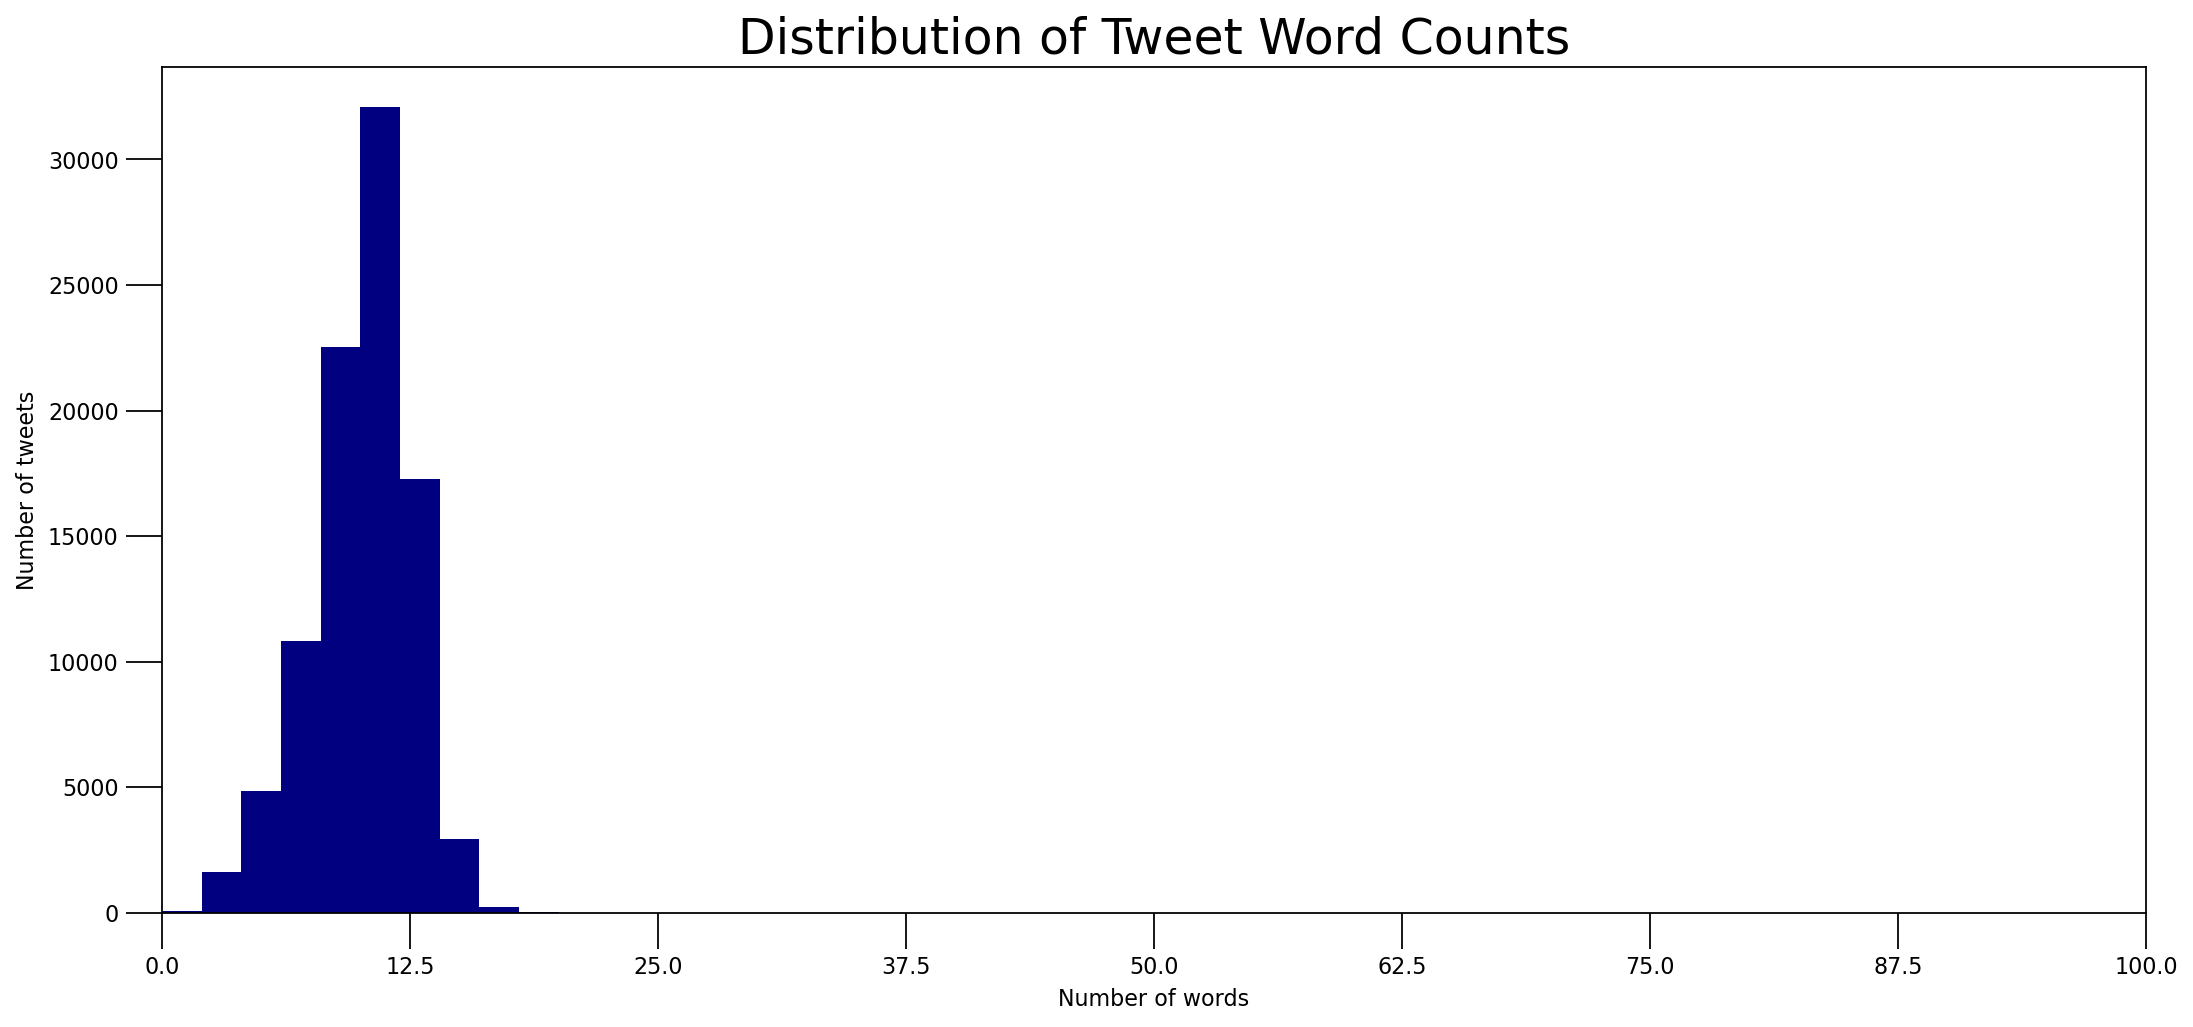

In [92]:
doc_lens = [len(d) for d in df_dominant_topic.Text]
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, color='navy')

plt.gca().set(xlim=(0, 60), ylabel='Number of tweets', xlabel='Number of words')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Tweet Word Counts', fontdict=dict(size=22))
plt.savefig('tweetwordcount.png',bbox_inches='tight',dpi=250)
plt.show()

##### <font color=red> The average number of words were around 11-12 for the maximum number of tweets.

## KDE plots used for univariate distribution of the topics.

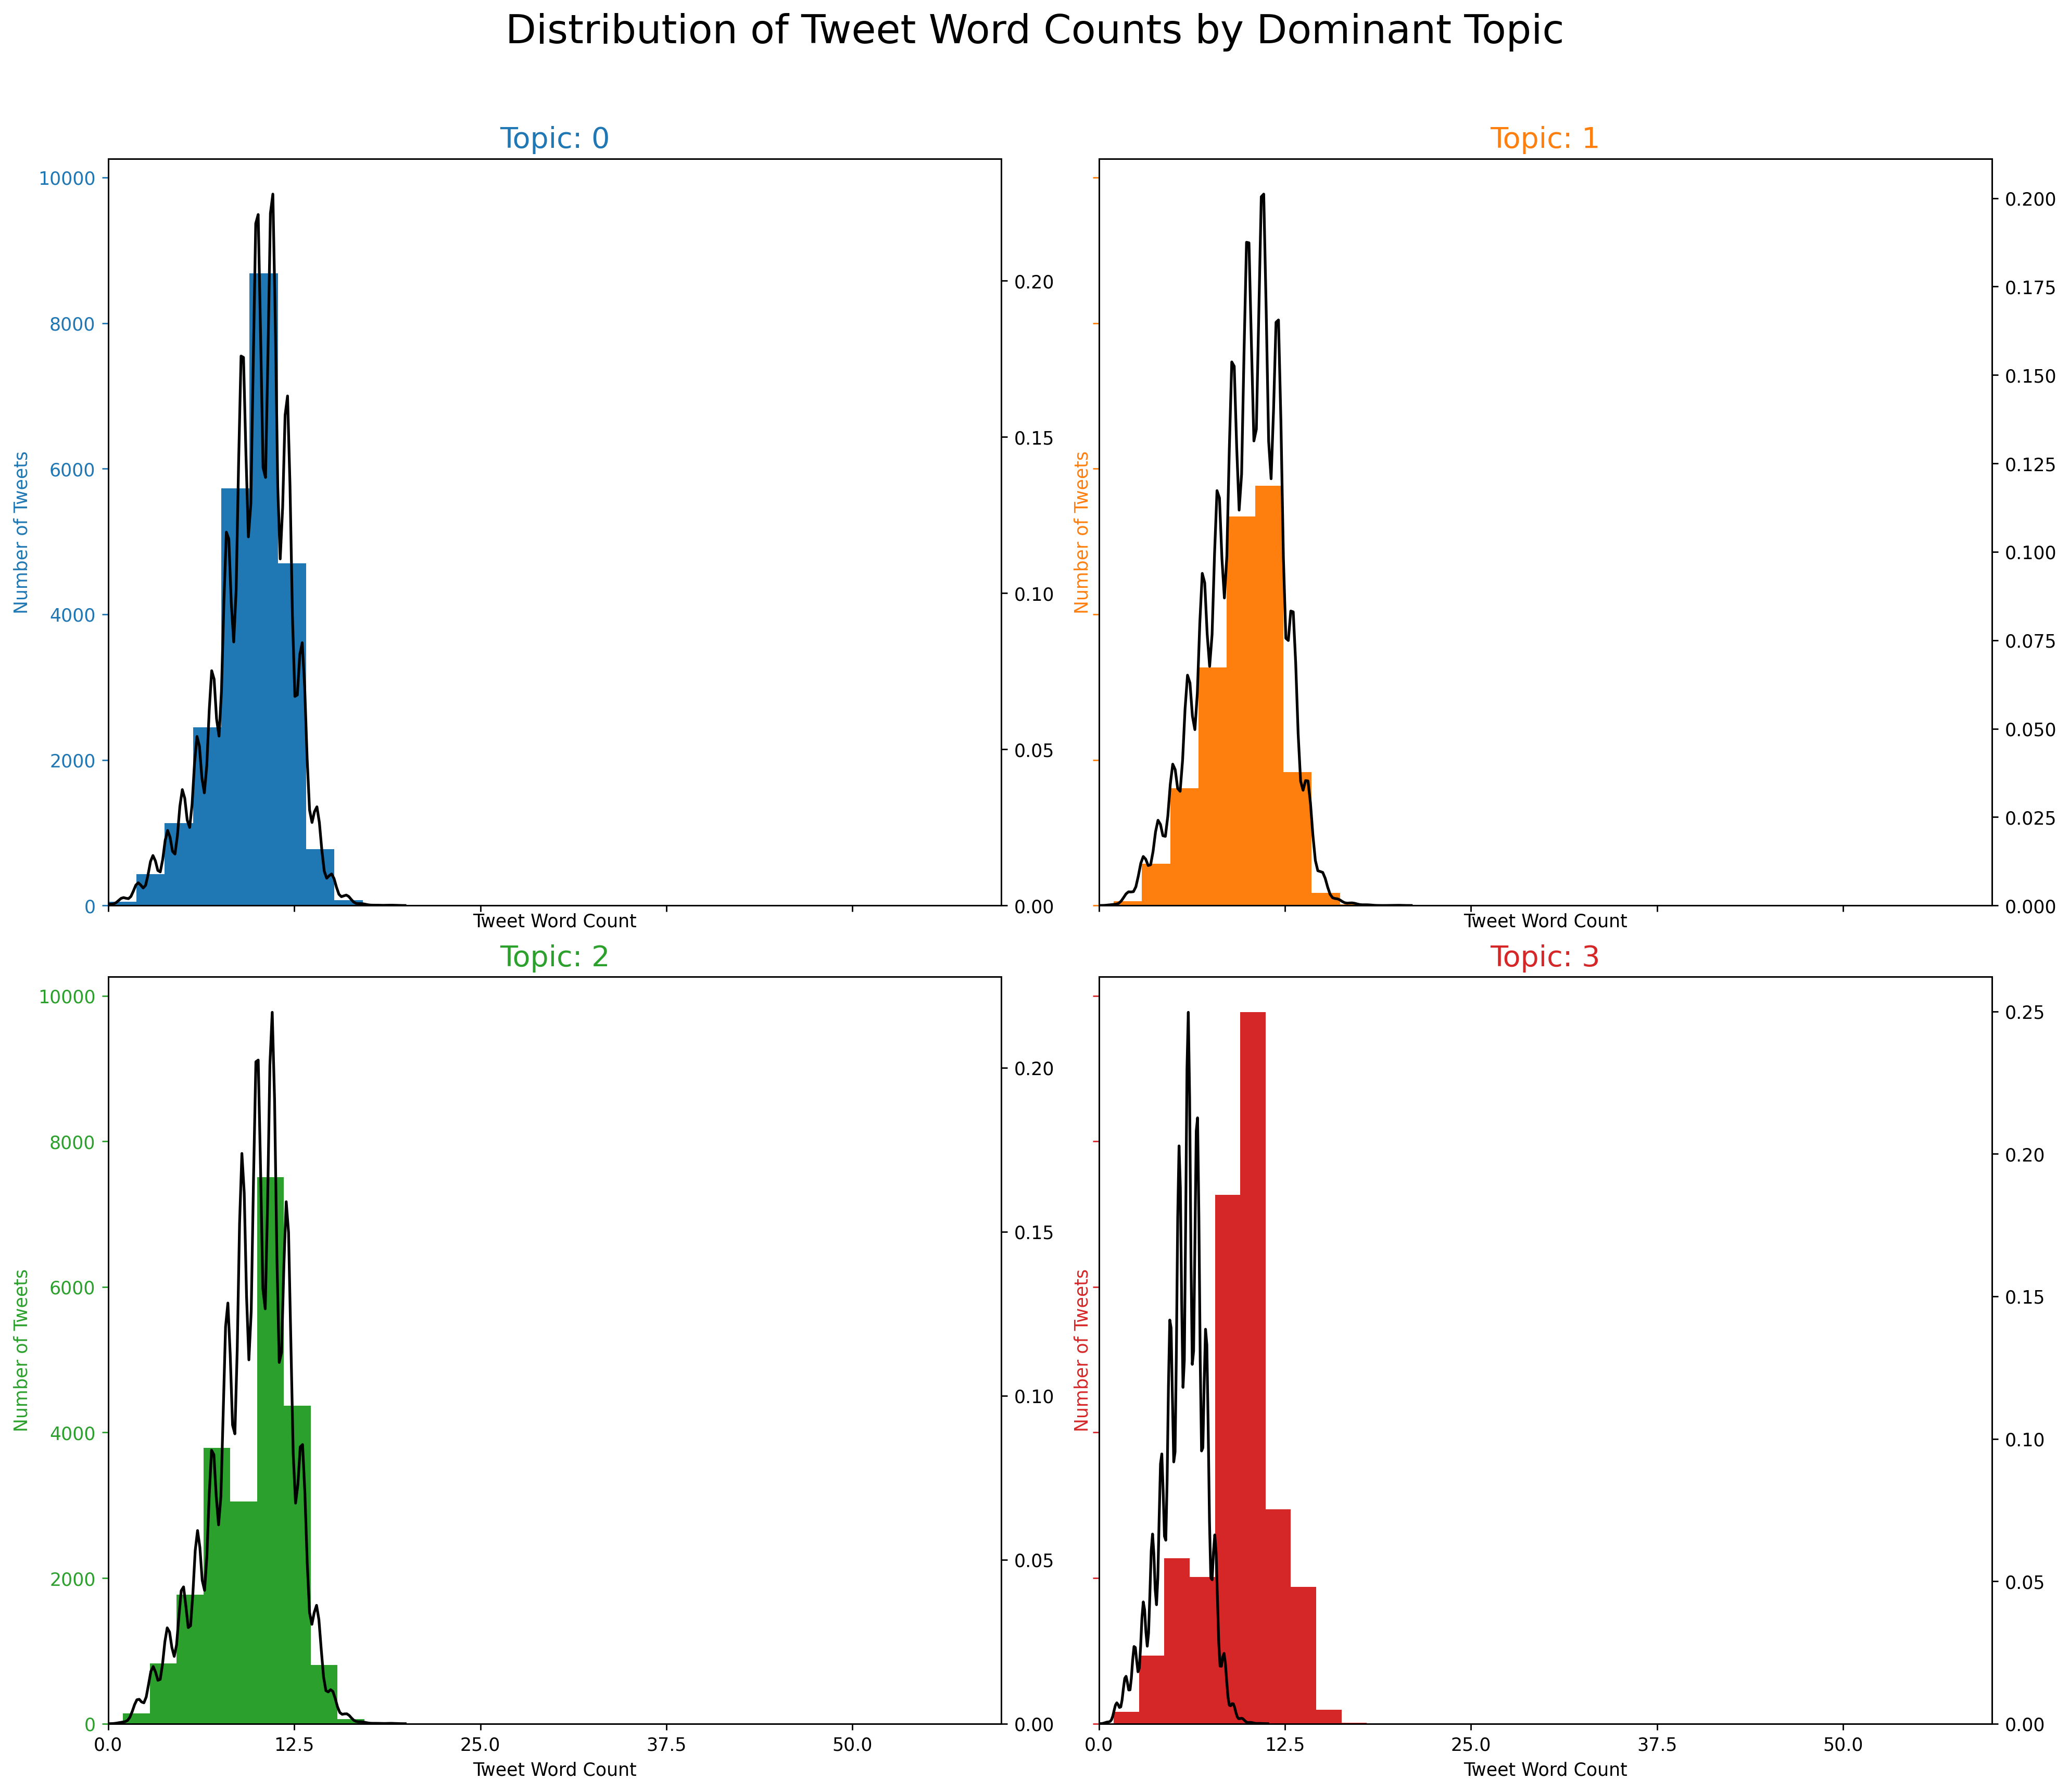

In [93]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=250, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 60), xlabel='Tweet Word Count')
    ax.set_ylabel('Number of Tweets', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Tweet Word Counts by Dominant Topic', fontsize=22)
plt.savefig("seabornplots.png",bbox_inches='tight',dpi=250)
plt.show()


## Wordclouds for these dominant topics

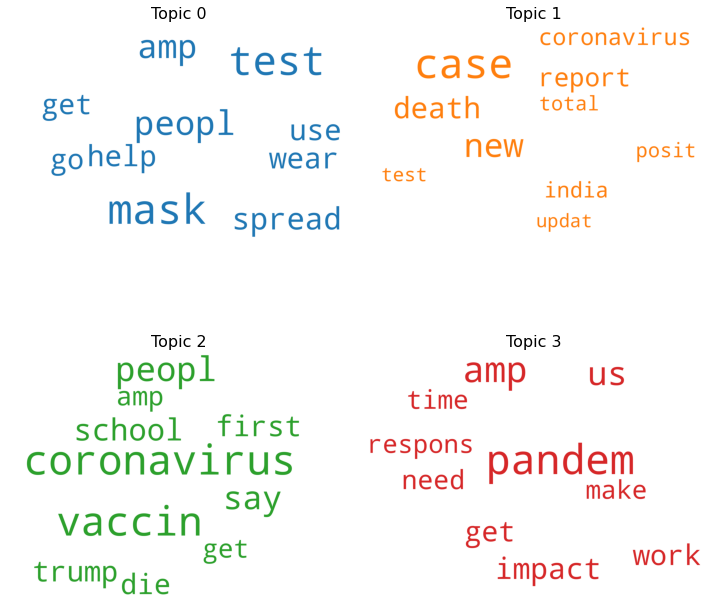

In [94]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('wordcloudstopics.png',bbox_inches='tight',dpi=250)
plt.show()

## Importance of keywords in each topic and their wordcounts

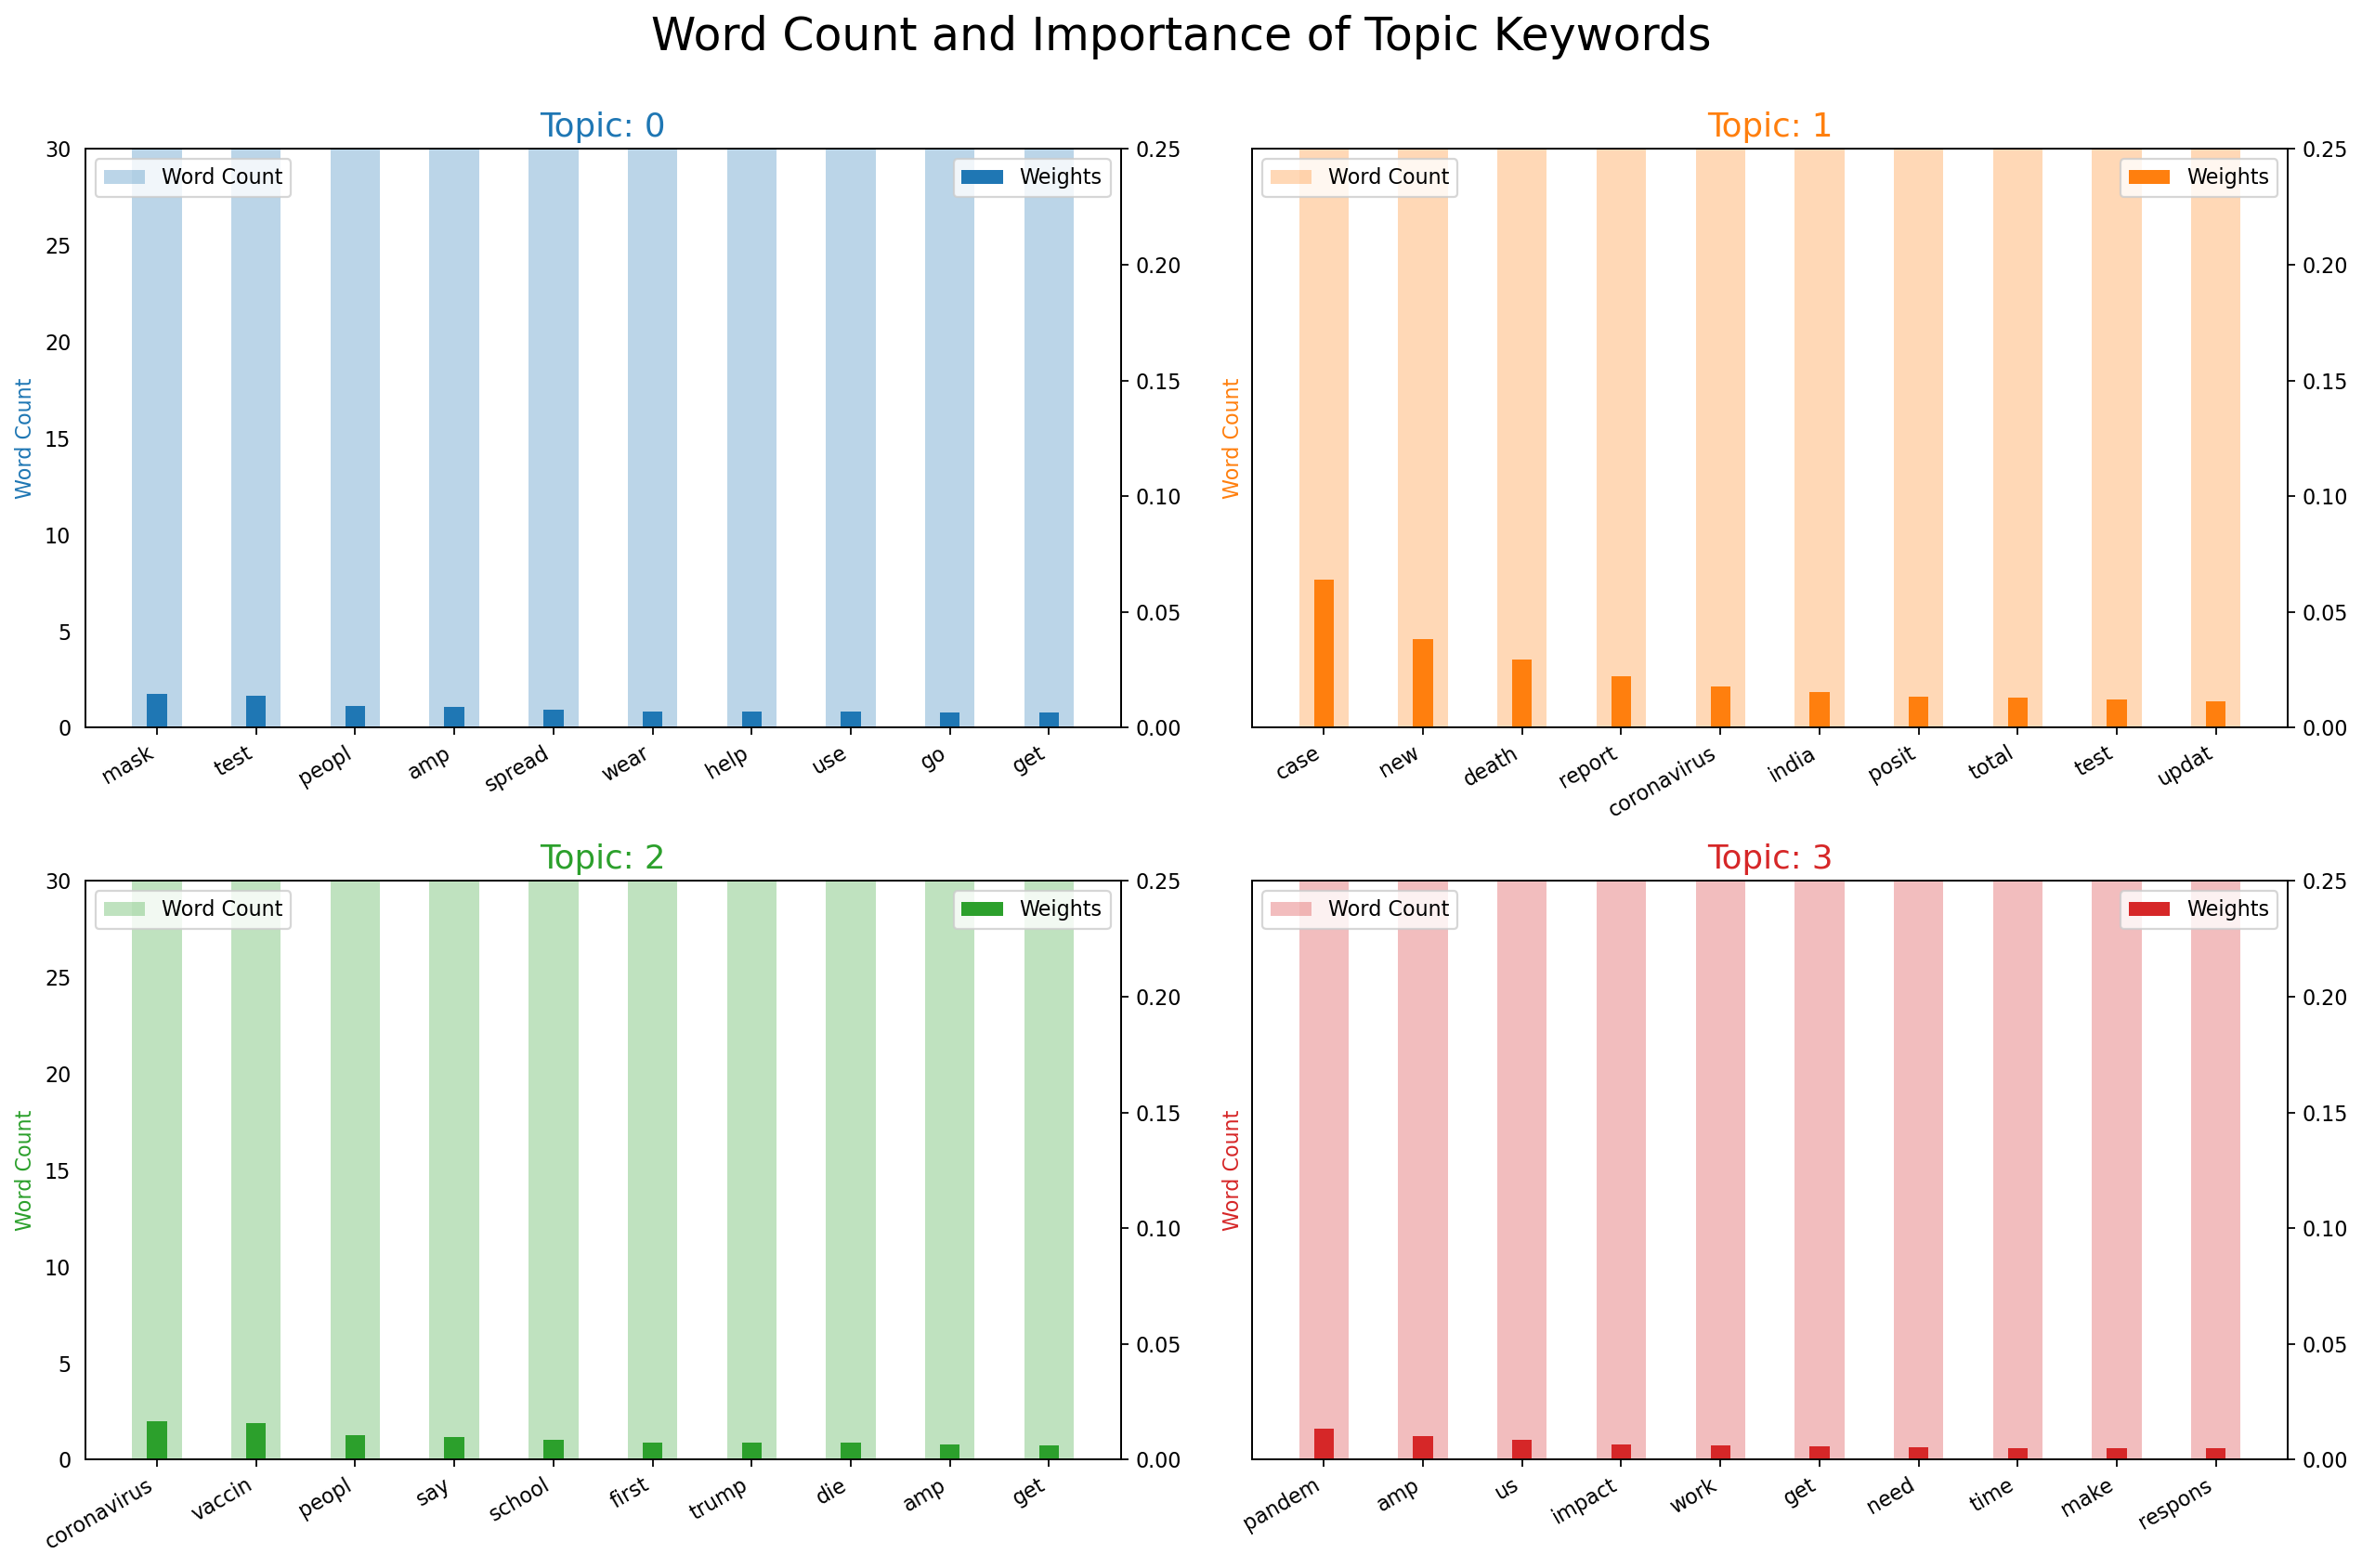

In [95]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.25); ax.set_ylim(0, 30)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.savefig('Wordcountkeywords.png',dpi=250,bbox_inches='tight')            
plt.show()

##### <font color=red> The words 'mask, case, coronavirus & pandem' are the most occuring words in the tweets

## Visualisation of LDA model

In [96]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.134593 -0.137732       1        1  26.953072
0      0.102713  0.006492       2        1  25.571600
2      0.054780  0.162035       3        1  24.146801
1     -0.292086 -0.030795       4        1  23.328526, topic_info=        Term          Freq         Total Category  logprob  loglift
99      case  10822.000000  10822.000000  Default  30.0000  30.0000
97       new   7485.000000   7485.000000  Default  29.0000  29.0000
92     death   5102.000000   5102.000000  Default  28.0000  28.0000
23    report   3776.000000   3776.000000  Default  27.0000  27.0000
32    vaccin   2770.000000   2770.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
167     test   2041.868164   5450.325195   Topic4  -4.4118   0.4737
93    infect    916.269287   1497.462646   Topic4  -5.2131   0.9643
753  patient    885.209351   1543.316772   Topic4  -5.2476   0.8996
380       us    953.217896   3650.576660   Topic4  -5.1735   0.1127
54       amp    970.325439   5695.258789   Topic4  -5.1558  -0.3143

[354 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2078      1  0.012107     abl
2078      2  0.974632     abl
2078      4  0.012107     abl
1361      2  0.987223  accept
1361      4  0.011218  accept
...     ...       ...     ...
240       3  0.722953    year
240       4  0.001701    year
3037      1  0.980032   youll
3262      1  0.975353  youtub
3262      3  0.021918  youtub

[825 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

##### <font color=red> Here we can specify the number of topics and hence find out the optimalnumber of estimated frquency within the selected topic.

#### Contribution of words for each topic

In [97]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.015*"mask" + 0.014*"test" + 0.009*"peopl" + 0.009*"amp" + 0.008*"spread" + 0.007*"wear" + 0.007*"help" + 0.007*"use" + 0.007*"go" + 0.007*"get"
Topic: 1 
Words: 0.064*"case" + 0.038*"new" + 0.030*"death" + 0.022*"report" + 0.018*"coronavirus" + 0.015*"india" + 0.013*"posit" + 0.013*"total" + 0.012*"test" + 0.011*"updat"
Topic: 2 
Words: 0.016*"coronavirus" + 0.016*"vaccin" + 0.011*"peopl" + 0.010*"say" + 0.008*"school" + 0.008*"first" + 0.008*"trump" + 0.007*"die" + 0.006*"amp" + 0.006*"get"
Topic: 3 
Words: 0.013*"pandem" + 0.010*"amp" + 0.008*"us" + 0.007*"impact" + 0.006*"work" + 0.006*"get" + 0.005*"need" + 0.005*"time" + 0.005*"make" + 0.005*"respons"


In [98]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"mask" + 0.005*"need" + 0.005*"get" + 0.004*"coronavirus" + 0.004*"go" + 0.004*"pandem" + 0.004*"amp" + 0.004*"wear" + 0.004*"peopl" + 0.004*"vaccin"
Topic: 1 Word: 0.006*"test" + 0.006*"coronavirus" + 0.004*"get" + 0.004*"say" + 0.004*"vaccin" + 0.004*"posit" + 0.004*"realdonaldtrump" + 0.004*"first" + 0.004*"trump" + 0.003*"peopl"
Topic: 2 Word: 0.005*"pandem" + 0.005*"amp" + 0.004*"peopl" + 0.003*"us" + 0.003*"impact" + 0.003*"coronavirus" + 0.003*"work" + 0.003*"busi" + 0.003*"test" + 0.003*"health"
Topic: 3 Word: 0.027*"case" + 0.016*"new" + 0.014*"death" + 0.012*"report" + 0.010*"india" + 0.010*"total" + 0.009*"coronavirus" + 0.008*"updat" + 0.007*"posit" + 0.007*"last"


In [99]:
for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.4731539189815521	 
Topic: 0.016*"coronavirus" + 0.016*"vaccin" + 0.011*"peopl" + 0.010*"say" + 0.008*"school" + 0.008*"first" + 0.008*"trump" + 0.007*"die" + 0.006*"amp" + 0.006*"get"

Score: 0.4605120122432709	 
Topic: 0.015*"mask" + 0.014*"test" + 0.009*"peopl" + 0.009*"amp" + 0.008*"spread" + 0.007*"wear" + 0.007*"help" + 0.007*"use" + 0.007*"go" + 0.007*"get"

Score: 0.034136153757572174	 
Topic: 0.013*"pandem" + 0.010*"amp" + 0.008*"us" + 0.007*"impact" + 0.006*"work" + 0.006*"get" + 0.005*"need" + 0.005*"time" + 0.005*"make" + 0.005*"respons"

Score: 0.03219794109463692	 
Topic: 0.064*"case" + 0.038*"new" + 0.030*"death" + 0.022*"report" + 0.018*"coronavirus" + 0.015*"india" + 0.013*"posit" + 0.013*"total" + 0.012*"test" + 0.011*"updat"


In [100]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6849015951156616	 
Topic: 0.005*"pandem" + 0.005*"amp" + 0.004*"peopl" + 0.003*"us" + 0.003*"impact" + 0.003*"coronavirus" + 0.003*"work" + 0.003*"busi" + 0.003*"test" + 0.003*"health"

Score: 0.24983438849449158	 
Topic: 0.006*"test" + 0.006*"coronavirus" + 0.004*"get" + 0.004*"say" + 0.004*"vaccin" + 0.004*"posit" + 0.004*"realdonaldtrump" + 0.004*"first" + 0.004*"trump" + 0.003*"peopl"

Score: 0.032833024859428406	 
Topic: 0.005*"mask" + 0.005*"need" + 0.005*"get" + 0.004*"coronavirus" + 0.004*"go" + 0.004*"pandem" + 0.004*"amp" + 0.004*"wear" + 0.004*"peopl" + 0.004*"vaccin"

Score: 0.03243096545338631	 
Topic: 0.027*"case" + 0.016*"new" + 0.014*"death" + 0.012*"report" + 0.010*"india" + 0.010*"total" + 0.009*"coronavirus" + 0.008*"updat" + 0.007*"posit" + 0.007*"last"


# Natural Language Processing

Natural Language Processing is the processing of natural language-based data, (unstructured in its original form) and using tools, techniques and algorithms. This notebook generally covers the aspects of processing and understanding text.

We are gonna cover the following aspects of NLP in this section - 
1. Webscraping of news headlines for different topics
2. Text wrangling and pre-processing
3. Parts of speech tagging
4. Parsing.
5. Constituency and dependency parsing

In [101]:
# importing the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [102]:
# Reading the dataset and dropping missing values
data=pd.read_csv('covid19_tweets.csv')
data.dropna(inplace = True)

In [103]:
data['text'].head()

2    @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim ...
3    @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that wer...
4    25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @...
5    #coronavirus #covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians ...
6    How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #R...
Name: text, dtype: object

In [104]:
news_df = data['text']

### Text preprocessing and Wrangling

This is used for cleaning the data. 

In [105]:
# Contraction map refers to the phrases or other short words or syllables which we use in our day to day lives to extract the real meaning behind it.
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [106]:
# import necessary modules for text preprocessing
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import contractions_dict
import unicodedata
nlp = spacy.load('en_core_web_md', parse=True, tag=True, entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [107]:
# We are gonna remove the html tags from the headline
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2><html>You are awesome <html></h2></html>')

'You are awesome '

In [108]:
# converting the accented characters to normal ASCII text
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Áccěntěd těxt')

'Accented text'

In [109]:
# Expanding the contractions dictionary 
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Aren't we going there. Can't you understand what i'm saying")

'Are not we going there. Cannot you understand what i am saying'

In [110]:
# removing alpha numeric characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [111]:
# Stemming the words to remove inflections
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("He jumps on roofs")

'He jump on roof'

In [112]:
# removal of word affixes to get the base form of the word
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("I want to go and play. He had been playing daily, i also want to play")

'I want to go and play . He have be play daily , i also want to play'

In [113]:
# words having little or no significance are removed from the text.
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [114]:
# Here we build a text normalizer or a function which applies all the above methods like lemmatization, stemming, removing stopwords etc.
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [115]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

### Parts of speech tagging

In [116]:
# create a basic pre-processed corpus, don't lowercase to get POS context
corpus = normalize_corpus(news_df, text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

# demo for POS tagging for sample news headline
sentence = str(news_df.iloc[1])
sentence_nlp = nlp(sentence)

# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

Word POS tag
0              @brookbanktv      IN
1                       The      DT
2                       one      CD
3                      gift      NN
4                  #COVID19      NN
5                       has     VBZ
6                      give      VB
7                        me     PRP
8                        is     VBZ
9                        an      DT
10             appreciation      NN
11                      for      IN
12                      the      DT
13                   simple      JJ
14                   things     NNS
15                     that     WDT
16                     were     VBD
17                   always      RB
18                   around      IN
19                      me…     NNS
20  https://t.co/Z0pOAlFXcW     VBP

##### <font color=red> The '@brookbanktv' word is the most common topic with 'The' next to it.

In [117]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHALESH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Chunking 

In [118]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\SHALESH\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [119]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [120]:
# use tree2conlltags top get triples of word, tag and chunk tags for each token
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[1])
wtc

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [121]:
# define a function conll_tag_ chunks() to extract POS and chunk tags from sentences with chunked annotations and a function called combined_taggers() to train multiple taggers with backoff taggers
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]


def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff 

In [122]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

# define the chunker class
class NGramTagChunker(ChunkParserI):
    
    def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
        train_sent_tags = conll_tag_chunks(train_sentences)
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

    def parse(self, tagged_sentence):
        if not tagged_sentence: 
            return None
        pos_tags = [tag for word, tag in tagged_sentence]
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
        wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                         in zip(tagged_sentence, chunk_tags)]
        return conlltags2tree(wpc_tags)
  
# train chunker model  
ntc = NGramTagChunker(train_data)

# evaluate chunker model performance
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


##### <font color=red> Our chunking model gets an accuracy of 90%.

In [123]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (PP @brookbanktv/IN)
  (NP The/DT one/CD gift/NN #COVID19/NN)
  (VP has/VBZ give/VB)
  (NP me/PRP)
  (VP is/VBZ)
  (NP an/DT appreciation/NN)
  (PP for/IN)
  (NP the/DT simple/JJ things/NNS)
  (NP that/WDT)
  (VP were/VBD always/RB)
  (PP around/IN)
  (NP me…/NNS)
  (VP https://t.co/Z0pOAlFXcW/VBP))


### Dependency Parsing

In [124]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---@brookbanktv[ROOT]--->[]
--------
[]<---The[det]--->[]
--------
[]<---one[nummod]--->[]
--------
['The', 'one']<---gift[ROOT]--->[]
--------
[]<---#[nmod]--->[]
--------
['#']<---COVID19[nsubj]--->[]
--------
[]<---has[aux]--->[]
--------
['COVID19', 'has']<---give[csubj]--->['me']
--------
[]<---me[dobj]--->[]
--------
['give']<---is[ROOT]--->['appreciation', 'https://t.co/Z0pOAlFXcW']
--------
[]<---an[det]--->[]
--------
['an']<---appreciation[attr]--->['for']
--------
[]<---for[prep]--->['things']
--------
[]<---the[det]--->[]
--------
[]<---simple[amod]--->[]
--------
['the', 'simple']<---things[pobj]--->['were']
--------
[]<---that[nsubj]--->[]
--------
['that']<---were[relcl]--->['always', 'around']
--------
[]<---always[advmod]--->[]
--------
[]<---around[prep]--->['me']
--------
[]<---me[pobj]--->[]
--------
[]<---…[punct]--->[]
--------
['…']<---https://t.co/Z0pOAlFXcW[attr]--->[]
--------


# Visulaizations from the Case Study

 #### <font color=red> Through all the models, visualizations & predictions I was able to derive the following insights with some great points discussed below.

I addressed issues surrounding public sentiment reflecting deep concerns about Coronavirus and COVID-19, leading to the dentification of growth in fear sentiment and negative sentiment. I also demonstrated the use of exploratory and descriptive textual analytics and textual data visualization methods, to discover early stage insights, such as by grouping of words by levels of a specific non-text variable. Finally, I provided a comparison of textual classification mechanisms used in artificial intelligence applications, and demonstrated their usefulness for varying lengths of Tweets.

#### <font color=red> It appears there is high variability in Twitter sentiment to begin with. Positive sentiment generally lies between 1.00 and 0.50 — in other words, statements are 50–100% positive. Neutral and negative sentiment lie between 0.0 and 0.30.

In the coronavirus period, we expected to see a decreased positive sentiment and increased negative sentiment. However, we were surprised to find lower negative sentiment scores. There was one notable dip in positive sentiment in the first week of March — the week when the first death was reported in the US.

#### <font color=red> Before the pandemic started, the term ‘corona’ was mostly associated with the beer. We can see that ‘Corona’ started off with compound sentiment consistently above zero, or positive. However, March marks a change in meaning: the compound sentiment inverts to the negatives and the level of negative sentiment trends upward.

Predictably, in the beginning the top terms in the ‘corona’ tweets are ‘virus’, ‘china’, ‘chinese’, etc. ‘Trump’ enters the chart mid-February as the White House Coronavirus Task Force begins in earnest as well as his briefings. During this time, interestingly, ‘hoax’ trends highly, perhaps as a result of a lack of widespread knowledge on COVID-19 and the relatively small impact of COVID-19 in the U.S. at the time.

#### <font color=red>People are not looking for or talking about COVID-19 in a medical or informational way; most people by this point are well-acquainted with such information.

COVID-19 begins to top both charts quickly, in a multitude of forms (i.e. ‘coronavirus, ‘‘corona’, ‘virus’, etc). For ‘china’, ‘virus’ first enters the top 15 on the week of Jan. 5th, around the time that China first announced a mysterious, pneumonia-like illness which we now know as COVID-19. ‘Coronavirus’ dominates that chart from then on, as well as words associated with it, such as ‘wuhan’, ‘cases’, and ‘outbreak’. 

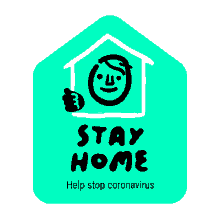

### Thanks a lot for your patience for making upto this far, and I have tried my best putting all the possible models to a single piece of code with the visualizations and insights from the data mentioned with the grah and at the end of the document.